In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
referendum = pd.read_csv("./data/referendum.csv", ";")
regions = pd.read_csv("./data/regions.csv", ",")
departments = pd.read_csv("./data/departments.csv", ",")

In [3]:
referendum.head()

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52


In [12]:
departments.head()

,id,region_code,code,name,slug
0,1,84,01,Ain,ain
1,2,32,02,Aisne,aisne
2,3,84,03,Allier,allier
3,4,93,04,Alpes-de-Haute-Provence,alpes de haute provence
4,5,93,05,Hautes-Alpes,hautes alpes


In [13]:
regions_and_departments = pd.merge(regions, departments, left_on='code', right_on='region_code', how='left'
             ).drop(
                ['code_x','id_x', 'slug_x', 'slug_y', 'id_y'], axis=1
            ).rename(columns=
                {'region_code':'code_reg', 'name_x':'name_reg','code_y':'code_dep','name_y':'name_dep'}
            )

regions_and_departments.sort_values(by='code_dep', ascending= True, inplace=True)

regions_and_departments.head()

,name_reg,code_reg,code_dep,name_dep
81,Auvergne-Rhône-Alpes,84,01,Ain
32,Hauts-de-France,32,02,Aisne
82,Auvergne-Rhône-Alpes,84,03,Allier
93,Provence-Alpes-Côte d'Azur,93,04,Alpes-de-Haute-Provence
94,Provence-Alpes-Côte d'Azur,93,05,Hautes-Alpes


In [25]:
merge_referendum_and_areas = pd.merge(regions_and_departments, referendum, left_on='code_dep', right_on='Department code', how='inner')

merge_referendum_and_areas = merge_referendum_and_areas.groupby('code_reg')[['Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B']].sum()
merge_referendum_and_areas.head()

,Registered,Abstentions,Null,Choice A,Choice B
code_reg,,,,,
11,6942361,1515884,85997,2536620,2803860
24,1801366,326560,28827,590890,855089
27,1997925,358321,33671,668246,937687
28,2372779,426075,35513,816972,1094219
32,3834376,793627,55405,1290341,1695003


In [54]:

import geopandas as gpd
import matplotlib.pyplot as plt


    100% |████████████████████████████████| 14.4MB 556kB/s ta 0:00:01
    Complete output from command python setup.py egg_info:
    /private/var/folders/6c/pmf_g_cj0zlgl8df6m_t0mcc0000gn/T/pip-install-bsi8hxac/cartopy/setup.py:107: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
      '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
    Proj 4.9.0 must be installed.
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/6c/pmf_g_cj0zlgl8df6m_t0mcc0000gn/T/pip-install-bsi8hxac/cartopy/


ModuleNotFoundError: No module named 'geoplot'

In [48]:
geo_reg = gpd.read_file('./data/regions.geojson')
geo_reg.head()




,code,nom,geometry
0,11,Île-de-France,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ..."
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ..."
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240..."
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ..."


In [67]:
geo_referundum = pd.merge(geo_reg, merge_referendum_and_areas, left_on='code', right_on='code_reg', how='inner')
geo_referundum['choice_A_ratio'] = geo_referundum['Choice A']/geo_referundum['Choice B']

,code,nom,geometry,Registered,Abstentions,Null,Choice A,Choice B,choice_A_ratio
0,11,Île-de-France,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...",6942361,1515884,85997,2536620,2803860,0.904689
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",1801366,326560,28827,590890,855089,0.691027
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...",1997925,358321,33671,668246,937687,0.712654
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",2372779,426075,35513,816972,1094219,0.746626
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",3834376,793627,55405,1290341,1695003,0.761262


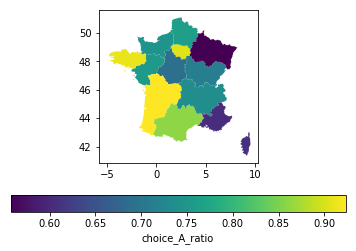